# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". A synthetic dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [94]:
path = r"D:\Escuela\SextoSemestre\SemanaTec\TC1002S\NotebooksStudents\A01639678\datasets\SyntheticData4Clustering_X.csv"

In [95]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily

# Importing data

In [96]:
# Load the dataset
df  = pd.read_csv(path)

# Understanding and preprocessing the data

1. Get a general 'feel' of the data


In [97]:
# Print the dataframe
df

,x1,x2,x3,x4,x5,x6
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334
...,...,...,...,...,...,...
1019,3.685106,-1.715503,-5.674443,6.510551,-0.121862,-6.166649
1020,-7.014173,-9.697874,4.093272,-0.590262,-9.882245,2.339336
1021,-2.993762,7.528182,7.877165,8.895835,9.318544,-7.445100
1022,4.576644,-1.720788,-6.581909,4.745839,1.497980,-4.828975


In [98]:
# get the number of observations and variables
# Observations
rows_count = df.shape[0]
print('Number of Rows count is:', rows_count )
# Variables
columns_count = df.shape[1]
print('Number of Columns count is:', columns_count )

Number of Rows count is: 1024
Number of Columns count is: 6


2. Drop rows with any missing values


In [99]:
# Drop rows with NaN values if existing
df.dropna()
# Print the new shape
df.shape

(1024, 6)

3. Scatterplot




<Axes: xlabel='x1', ylabel='x2'>

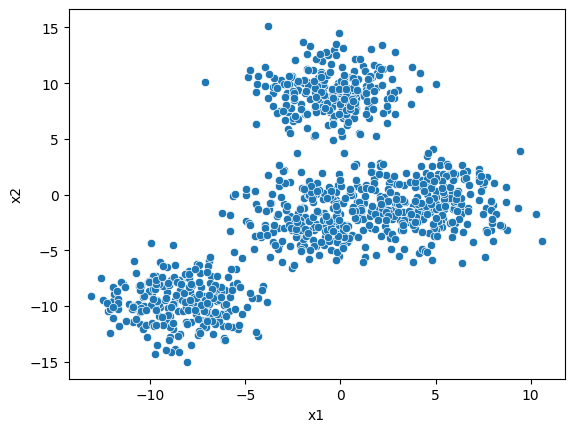

In [100]:
# Scatterplot of x1 and x2
sns.scatterplot(data=df,y="x2", x="x1")

<Axes: xlabel='x1', ylabel='x3'>

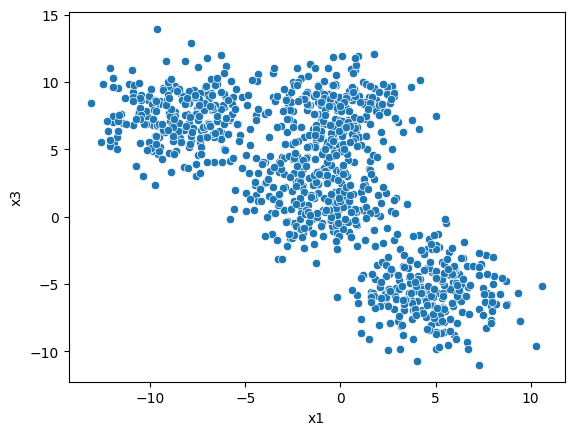

In [101]:
# Scatterplot of x1 and x3
sns.scatterplot(data=df,y="x3", x="x1")

Difficult to plot independetly all combinations, let's use pairplot

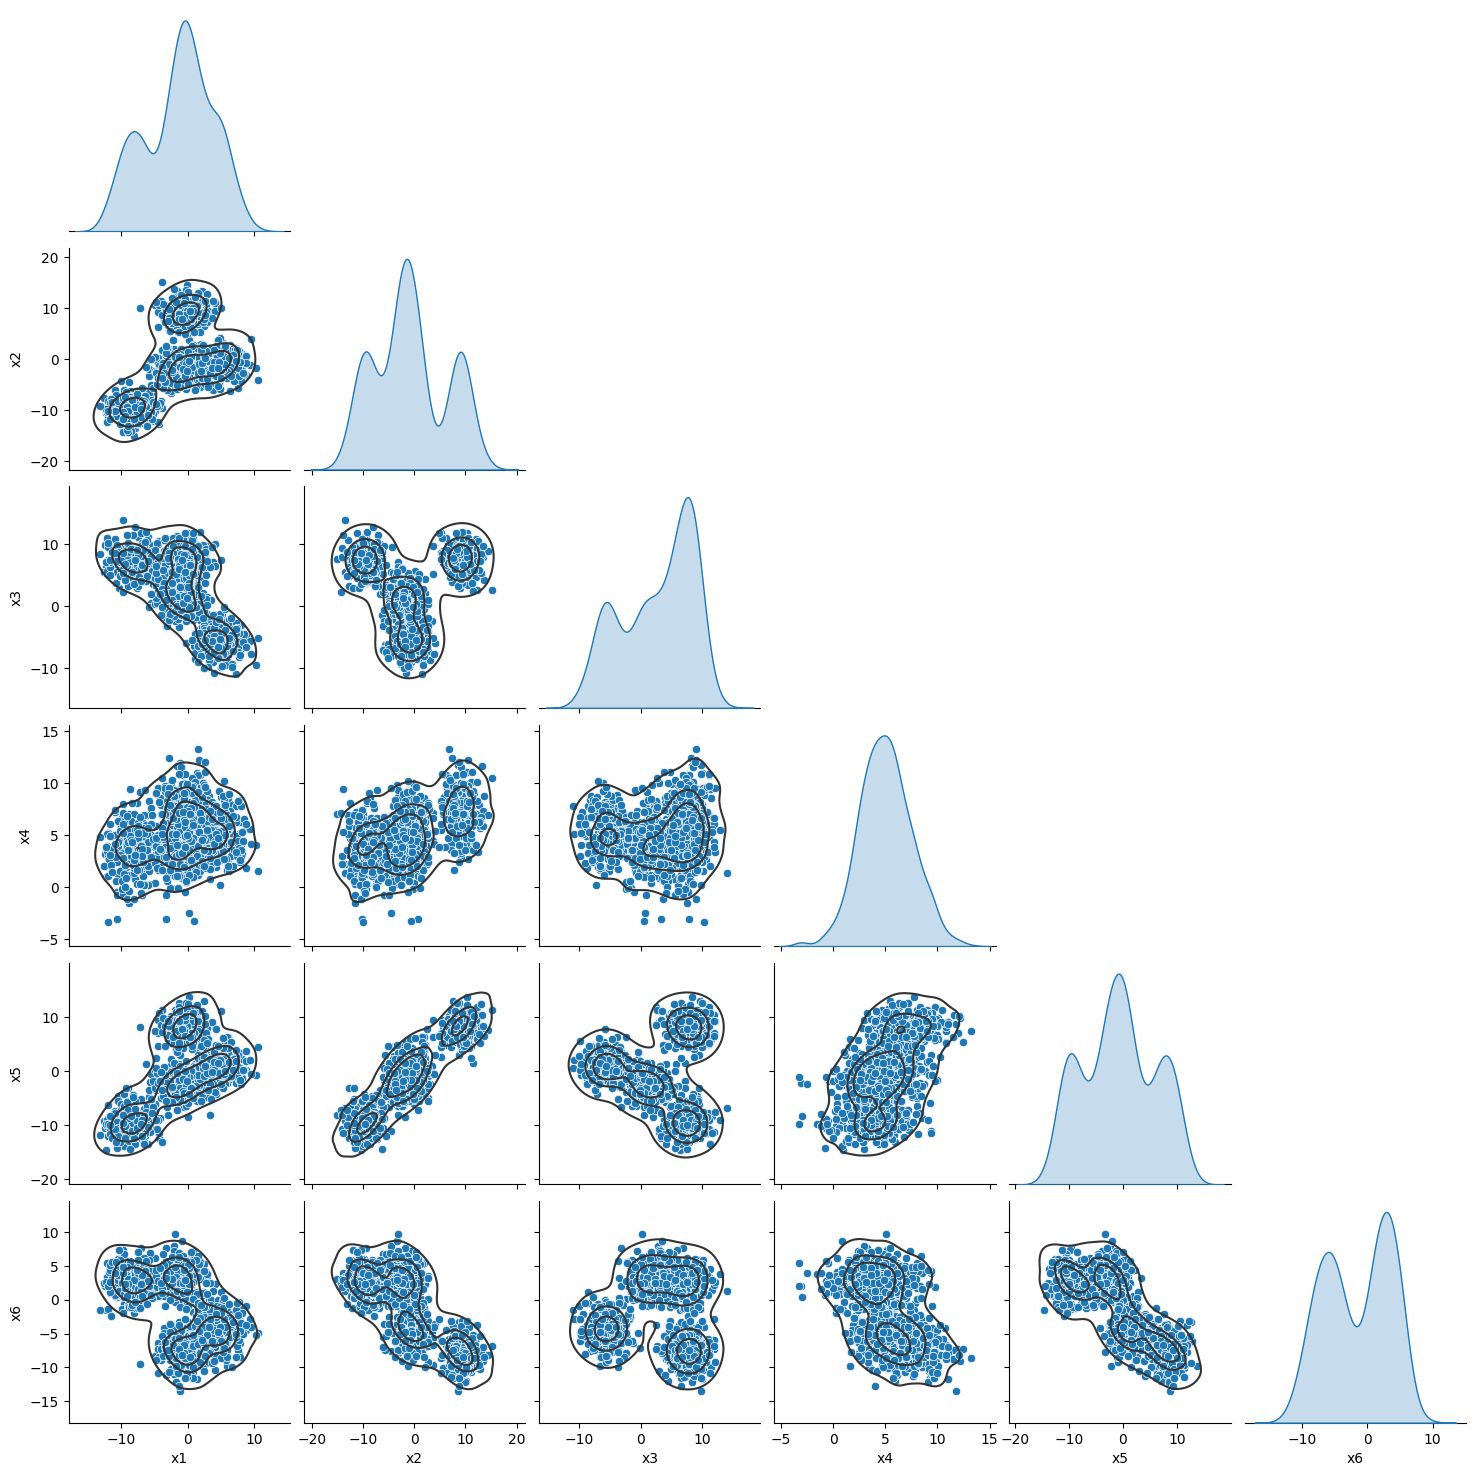

In [102]:
# Pairplot: Scatterplot of all variables
#sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df, corner = True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4,color=".2")
plt.show()

It looks like there are 3 or 4 clusters/groups

Note that we do not know in advance the class/cluster/group to which each point belongs to: we need to apply unsupervised learning ¡

# Kmeans clustering

Kmeans clustering

In [103]:
# Import sklearn KMeans
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# Define number of clusters
K  = 5 # Let's assume there are 2,3,4,5...? clusters/groups
km = KMeans(n_clusters=K, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster) 
yestimated = km.fit_predict(df)

# Print estimated cluster of each point in the dataset
yestimated

array([1, 0, 0, ..., 0, 3, 3])

In [104]:
# Add a new column to the dataset with the cluster information
df["yestimated"] = yestimated
df.drop(axis=1, index=6, inplace=True)

df.head()

,x1,x2,x3,x4,x5,x6,yestimated
0,1.914825,-1.380503,-3.609674,4.236011,-5.158681,5.712978,1
1,1.356415,9.767893,7.263659,8.750819,5.568930,-6.039122,0
2,1.185186,11.528344,9.999419,7.890027,7.308210,-8.899397,0
3,-1.739155,12.648965,7.965588,7.850296,10.235743,-10.175542,0
4,7.890985,-3.210880,-7.672016,2.438106,3.310904,-3.308334,3


In [105]:
# Label of the estimated clusters
df.yestimated.unique()

array([1, 0, 3, 4, 2])

In [106]:
# Cluster centroides
centroids = km.cluster_centers_
centroids

array([[ -0.44229417,   9.13121533,   7.61409814,   7.22984721,
          8.13001382,  -7.6264221 ],
       [ -1.11162986,  -1.97482508,   1.3833106 ,   3.93069765,
         -2.6359108 ,   3.22632658],
       [ -9.35775975,  -9.74592438,   7.12155335,   2.61833842,
        -10.76737856,   3.17226381],
       [  4.75634768,  -0.75290959,  -5.5798822 ,   5.20729319,
          1.024779  ,  -4.30453201],
       [ -7.68841349,  -9.58039215,   7.69824329,   4.64436168,
         -8.56012395,   2.27579775]])

In [107]:
# Sum of squared error (sse) of the final model
sse = km.inertia_
sse

23610.71526014571

In [108]:
# The number of iterations required to converge
km.n_iter_

24

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the number in each cluster is random

# Plot estimated clusters

Plot estimated clusters

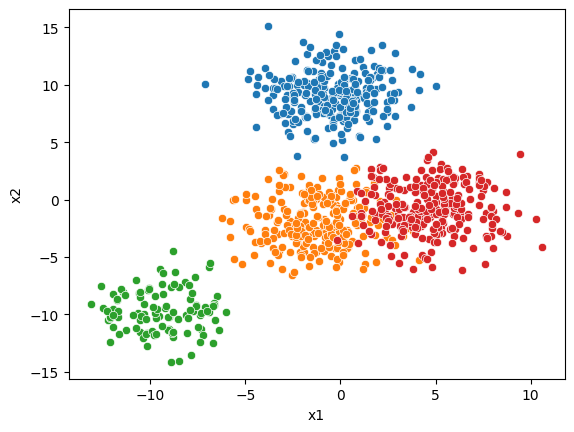

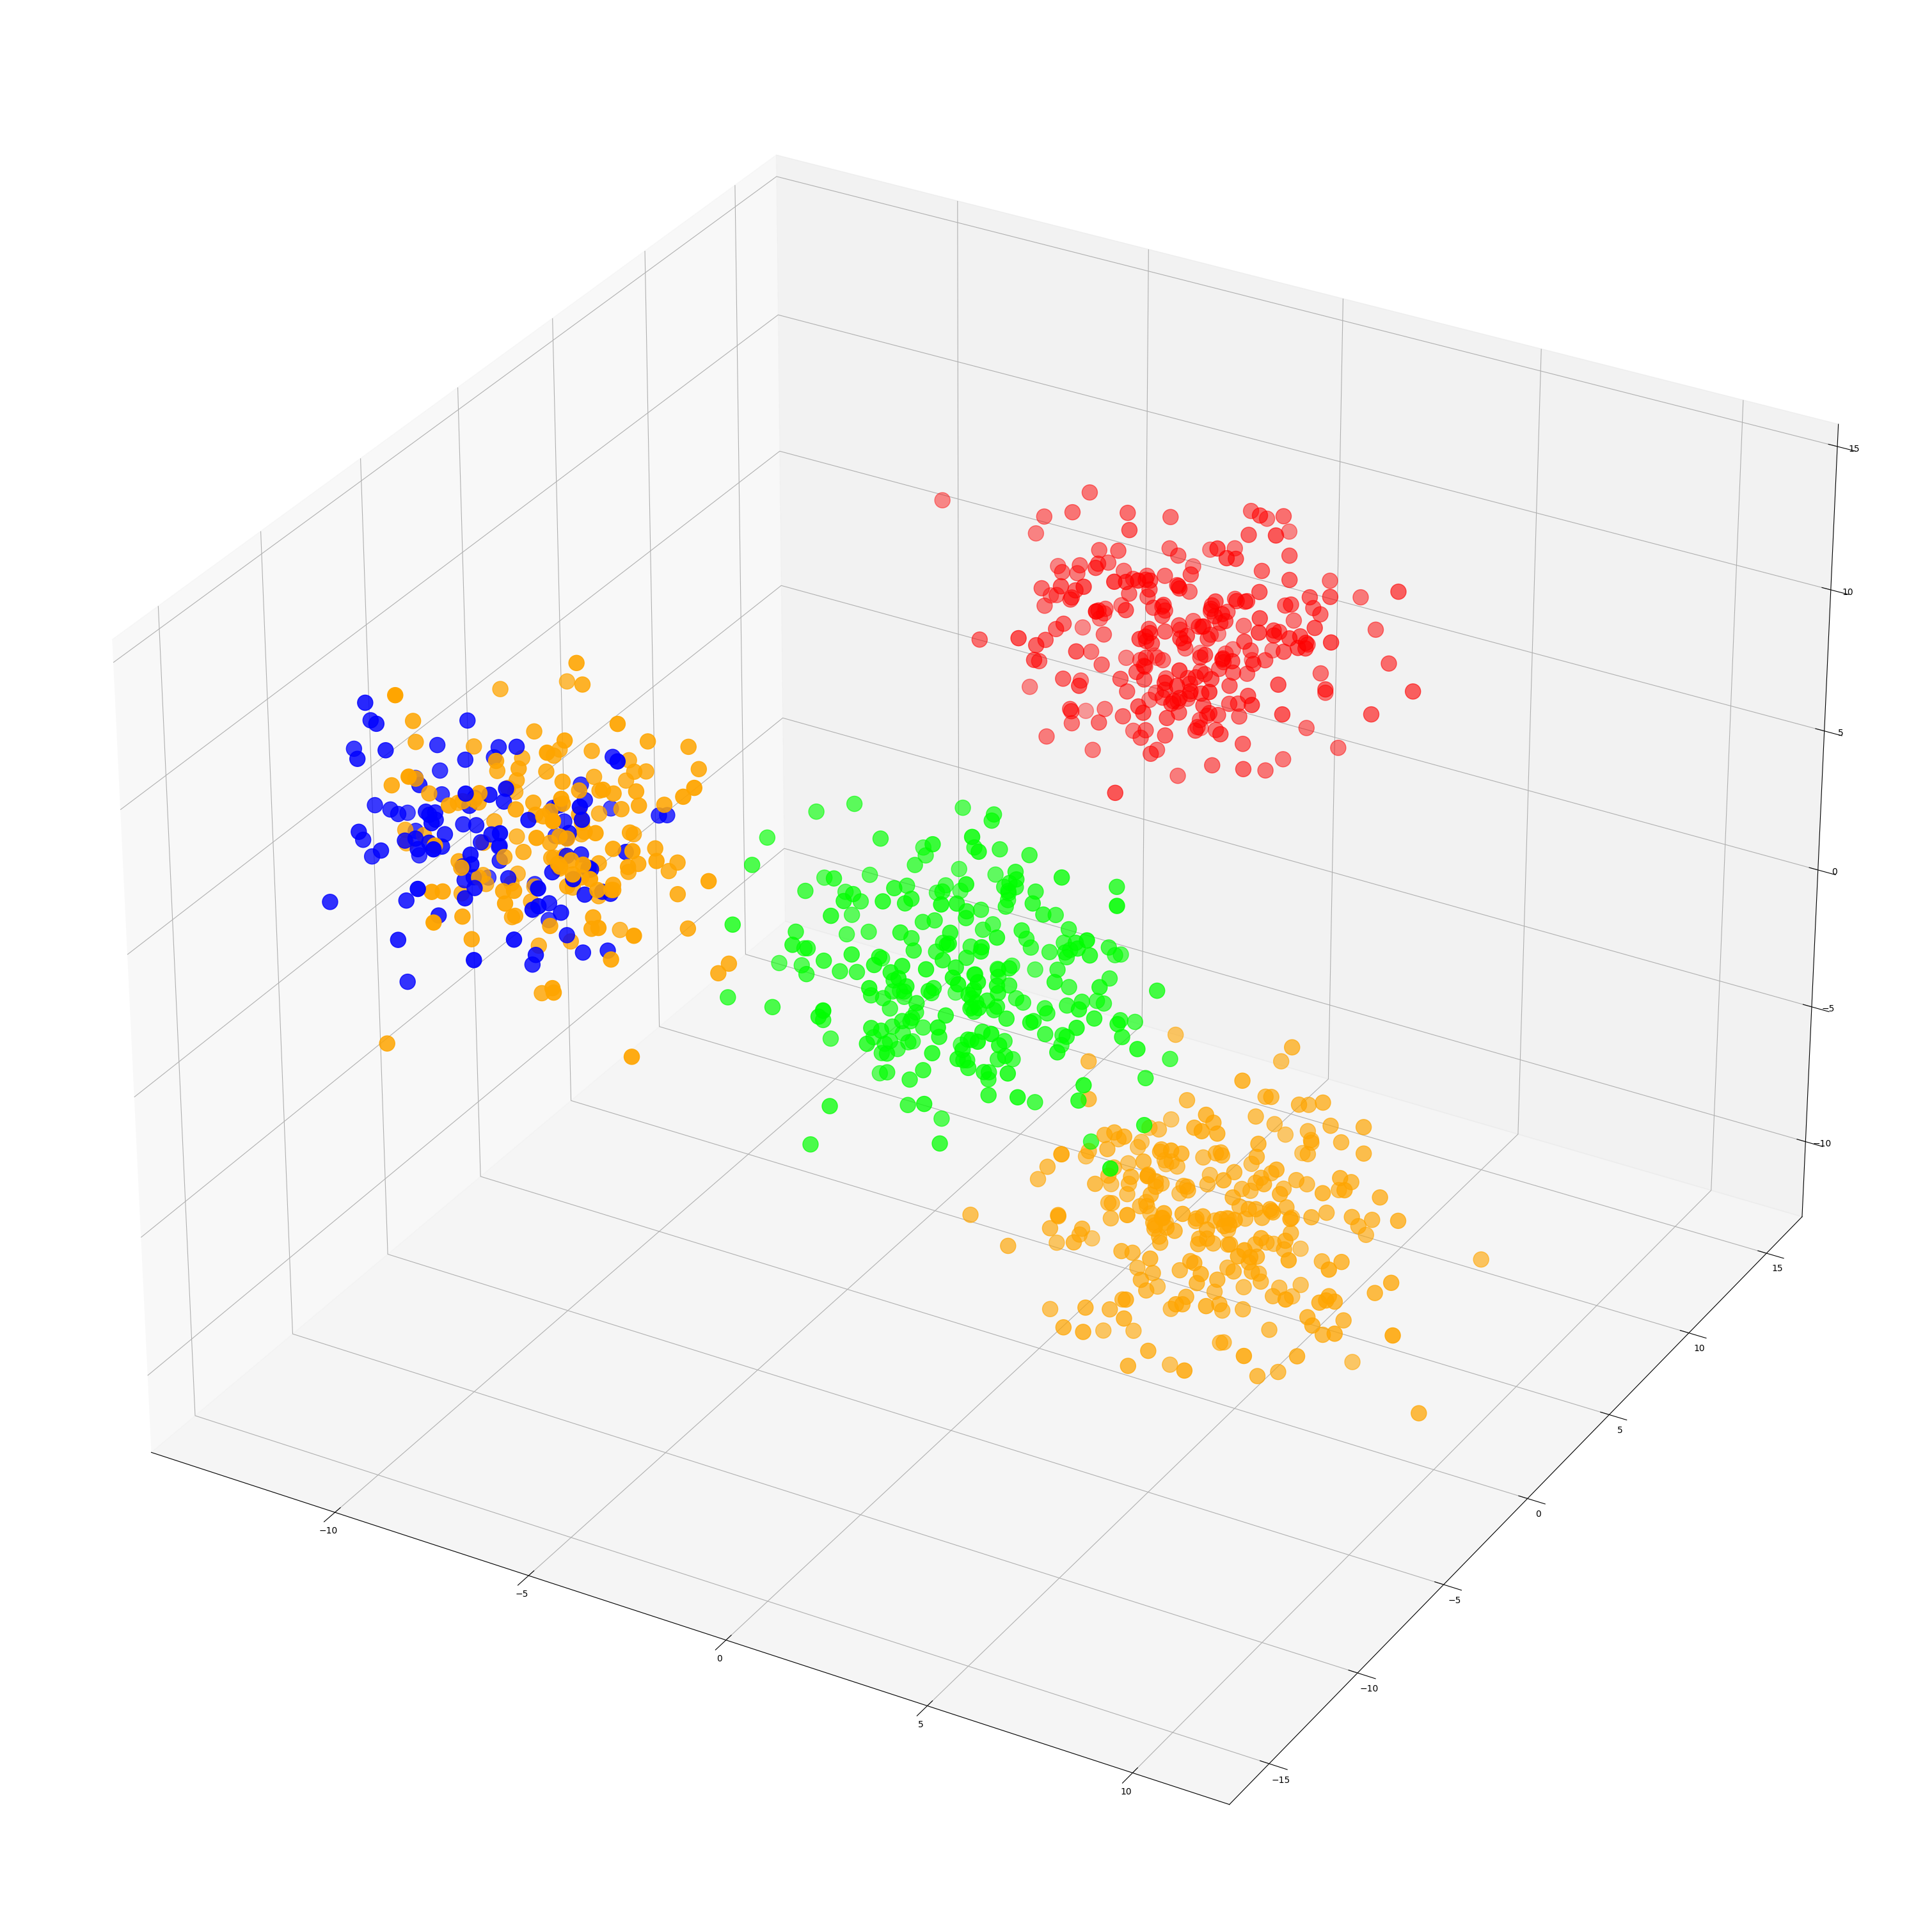

In [109]:
# Get a dataframe with the data of each clsuter

df_cluster0 = df[df['yestimated']==0]
df_cluster1 = df[df['yestimated']==1]
df_cluster2 = df[df['yestimated']==2]
df_cluster3 = df[df['yestimated']==3]


# Scatter plot of each cluster

sns.scatterplot(x="x1", y="x2", data=df_cluster0)
sns.scatterplot(x="x1", y="x2", data=df_cluster1)
sns.scatterplot(x="x1", y="x2", data=df_cluster2)
sns.scatterplot(x="x1", y="x2", data=df_cluster3)

fig = plt.figure(figsize=(30,30))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# Red, Green, Blue, Orange
color_map = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#FFA500'])

sc = ax.scatter(df["x1"], df["x2"], df["x3"], c=df["yestimated"], s=300, cmap=color_map)


# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

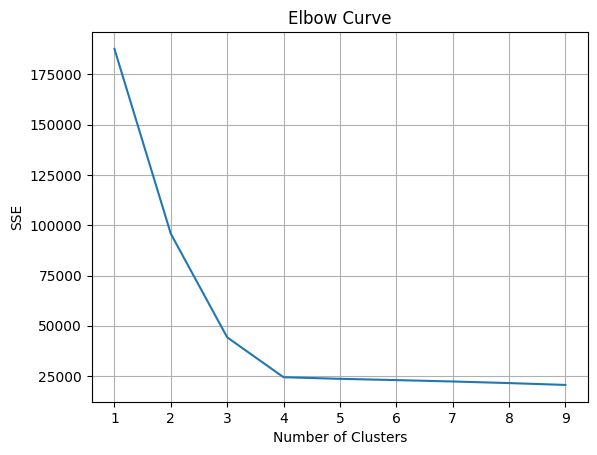

In [110]:
original_df = df.drop(axis=1, columns=['yestimated'])

# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k

k_values = range(1, 10)

# For each k
for k in k_values:
    # Create a kmeans model with k clusters
    km = KMeans(n_clusters=k, n_init='auto')
    # Fit the model to the data
    km.fit(original_df)
    # Append the SSE to the list
    sse.append(km.inertia_)

sse

plt.plot(k_values,sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Curve')
plt.grid()
plt.show()

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Observations?



# Final remarks

- K-Means clustering algorithm is perhaps the simplest and most popular unsupervised learning algorithm

- The number of clusters have to be defined by the user (i.e., by you ¡¡)

- The number assigned to each cluster is randomly assigned from set 0, 1, 2

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k

- The order of the number in each cluster is random

- The **sklearn** package provides the tools for data processing suchs as k-means

# Activity: 

1. Repeat this analysis using other pair of features, e.g., x3 and x6

2. Repeat this analysis using all six features, e.g., x1, x2,..., x6

3. Provide conclusions